Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data. Data analysts typically spend the majority of their time in the process of data wrangling compared to the actual analysis of the data.

The process of data wrangling may include further munging, data visualization, data aggregation, training a statistical model, as well as many other potential uses. Data wrangling typically follows a set of general steps which begin with extracting the data in a raw form from the data source, "munging" the raw data (e.g. sorting) or parsing the data into predefined data structures, and finally depositing the resulting content into a data sink for storage and future use.[1]

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/customer-churn-model/Customer Churn Model.txt')

In [3]:
data.shape

(3333, 21)

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Crear un subconjunto de datos o Extraer un subconjunto de datos

In [5]:
account_length = data ['Account Length']

In [6]:
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [7]:
type (account_length)

pandas.core.series.Series

In [8]:
subset = data[['Account Length', 'Phone', 'Eve Charge', 'Day Calls']]

In [9]:
subset.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [10]:
type(subset)

pandas.core.frame.DataFrame

In [11]:
desired_columns = ['Account Length', 'Phone', 'Eve Charge', 'Day Calls']
subset2 = data [desired_columns]
subset2.head()

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


Estos métodos estan bien cuando el número de columnas es limitado o bajo. Cuando es un número de columnas alto, se podrá considerar listas de valores que se quieren o no se quieren.

In [12]:
desired_columns = ['Account Length', 'VMail Message', 'Day Calls']
all_columns_list = data.columns.values.tolist()

In [13]:
desired_columns

['Account Length', 'VMail Message', 'Day Calls']

In [14]:
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [15]:
sublist = [column for column in all_columns_list if column not in desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [16]:
subset3 = data [sublist]
subset3.head()

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Otra forma de realizar lo anterior, es usando directamente subsets:

In [17]:
non_desired_set = set(desired_columns)
all_columns_set = set (all_columns_list)
sublist4 = data[list(all_columns_set-non_desired_set)]
sublist4.head()

,Night Charge,Intl Mins,Intl Charge,Intl Calls,Eve Calls,Night Calls,Eve Charge,Eve Mins,Area Code,Day Mins,Day Charge,CustServ Calls,State,Int'l Plan,VMail Plan,Phone,Night Mins,Churn?
0,11.01,10.0,2.70,3,99,91,16.78,197.4,415,265.1,45.07,1,KS,no,yes,382-4657,244.7,False.
1,11.45,13.7,3.70,3,103,103,16.62,195.5,415,161.6,27.47,1,OH,no,yes,371-7191,254.4,False.
2,7.32,12.2,3.29,5,110,104,10.30,121.2,415,243.4,41.38,0,NJ,no,no,358-1921,162.6,False.
3,8.86,6.6,1.78,7,88,89,5.26,61.9,408,299.4,50.90,2,OH,yes,no,375-9999,196.9,False.
4,8.41,10.1,2.73,3,122,121,12.61,148.3,415,166.7,28.34,3,OK,yes,no,330-6626,186.9,False.


In [18]:
sublist4 [1:25]

,Night Charge,Intl Mins,Intl Charge,Intl Calls,Eve Calls,Night Calls,Eve Charge,Eve Mins,Area Code,Day Mins,Day Charge,CustServ Calls,State,Int'l Plan,VMail Plan,Phone,Night Mins,Churn?
1,11.45,13.7,3.70,3,103,103,16.62,195.5,415,161.6,27.47,1,OH,no,yes,371-7191,254.4,False.
2,7.32,12.2,3.29,5,110,104,10.30,121.2,415,243.4,41.38,0,NJ,no,no,358-1921,162.6,False.
3,8.86,6.6,1.78,7,88,89,5.26,61.9,408,299.4,50.90,2,OH,yes,no,375-9999,196.9,False.
4,8.41,10.1,2.73,3,122,121,12.61,148.3,415,166.7,28.34,3,OK,yes,no,330-6626,186.9,False.
5,9.18,6.3,1.70,6,101,118,18.75,220.6,510,223.4,37.98,0,AL,yes,no,391-8027,203.9,False.
6,9.57,7.5,2.03,7,108,118,29.62,348.5,510,218.2,37.09,3,MA,no,yes,355-9993,212.6,False.
7,9.53,7.1,1.92,6,94,96,8.76,103.1,415,157.0,26.69,0,MO,yes,no,329-9001,211.8,False.
8,9.71,8.7,2.35,4,80,90,29.89,351.6,408,184.5,31.37,1,LA,no,no,335-4719,215.8,False.
9,14.69,11.2,3.02,5,111,97,18.87,222.0,415,258.6,43.96,0,WV,yes,yes,330-8173,326.4,False.
10,9.40,12.7,3.43,6,83,111,19.42,228.5,415,129.1,21.95,4,IN,no,no,329-6603,208.8,True.


In [19]:
sublist4 [10:35]

,Night Charge,Intl Mins,Intl Charge,Intl Calls,Eve Calls,Night Calls,Eve Charge,Eve Mins,Area Code,Day Mins,Day Charge,CustServ Calls,State,Int'l Plan,VMail Plan,Phone,Night Mins,Churn?
10,9.40,12.7,3.43,6,83,111,19.42,228.5,415,129.1,21.95,4,IN,no,no,329-6603,208.8,True.
11,8.82,9.1,2.46,5,148,94,13.89,163.4,415,187.7,31.91,0,RI,no,no,344-9403,196.0,False.
12,6.35,11.2,3.02,2,71,128,8.92,104.9,408,128.8,21.90,1,IA,no,no,363-1107,141.1,False.
13,8.65,12.3,3.32,5,75,115,21.05,247.6,510,156.6,26.62,3,MT,no,no,394-8006,192.3,False.
14,9.14,13.1,3.54,6,76,99,26.11,307.2,415,120.7,20.52,4,IA,no,no,366-9238,203.0,False.
15,7.23,5.4,1.46,9,97,128,27.01,317.8,415,332.9,56.59,4,NY,no,no,351-7269,160.6,True.
16,4.02,13.8,3.73,4,90,75,23.88,280.9,408,196.4,33.39,1,ID,no,yes,350-8884,89.3,False.
17,5.83,8.1,2.19,3,111,121,18.55,218.2,510,190.7,32.42,3,VT,no,no,386-2923,129.6,False.
18,7.46,10.0,2.70,5,65,108,18.09,212.8,510,189.7,32.25,1,VA,no,yes,356-2992,165.7,False.
19,8.68,13.0,3.51,2,88,74,13.56,159.5,415,224.4,38.15,1,TX,no,no,373-2782,192.8,False.


Ahora vamos a seleccionar usuarios con 'Day Mins' > 200

In [20]:
sublist4 [sublist4['Day Mins'] > 200]

,Night Charge,Intl Mins,Intl Charge,Intl Calls,Eve Calls,Night Calls,Eve Charge,Eve Mins,Area Code,Day Mins,Day Charge,CustServ Calls,State,Int'l Plan,VMail Plan,Phone,Night Mins,Churn?
0,11.01,10.0,2.70,3,99,91,16.78,197.4,415,265.1,45.07,1,KS,no,yes,382-4657,244.7,False.
2,7.32,12.2,3.29,5,110,104,10.30,121.2,415,243.4,41.38,0,NJ,no,no,358-1921,162.6,False.
3,8.86,6.6,1.78,7,88,89,5.26,61.9,408,299.4,50.90,2,OH,yes,no,375-9999,196.9,False.
5,9.18,6.3,1.70,6,101,118,18.75,220.6,510,223.4,37.98,0,AL,yes,no,391-8027,203.9,False.
6,9.57,7.5,2.03,7,108,118,29.62,348.5,510,218.2,37.09,3,MA,no,yes,355-9993,212.6,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,11.81,14.2,3.83,4,93,110,12.27,144.4,408,229.9,39.08,2,SC,no,no,406-6304,262.4,False.
3322,8.12,11.5,3.11,2,122,72,22.57,265.5,408,321.1,54.59,4,MD,no,no,409-1856,180.5,True.
3329,8.61,9.6,2.59,4,55,123,13.04,153.4,415,231.1,39.29,3,WV,no,no,370-3271,191.3,False.
3331,6.26,5.0,1.35,10,84,137,13.57,159.6,510,213.8,36.35,2,CT,yes,no,364-6381,139.2,False.


Ahora, vamos a seleccionar los usuarios de NY

In [21]:
data [data['State'] == 'NY']

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,NY,150,415,421-6268,no,yes,35,139.6,72,23.73,...,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False.
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.


Cuando queremos que se cumplan dos condiciones, usaremos los operadores de Python. En primer lugar, filtraremos usuario que hablen mas de 300 minutos y sean usuarios de NY.

In [22]:
data [(data ['Day Mins'] > 300) & (data ['State'] == 'NY')]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [23]:
data [(data ['Day Mins'] > 300) | (data ['State'] == 'NY')]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.
3310,NY,94,415,363-1123,no,no,0,190.4,91,32.37,...,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False.


Ahora vamos a seleccionar los usuarios de Ohio (OH) con longitud > 100

In [24]:
data [(data ['State'] == 'OH') & (data['Account Length'] > 100)]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
462,OH,144,415,392-3813,no,yes,18,106.4,109,18.09,...,113,9.19,208.4,111,9.38,10.1,5,2.73,1,False.
506,OH,136,415,407-2248,no,yes,31,143.1,88,24.33,...,65,20.11,227.8,120,10.25,11.4,5,3.08,2,False.
866,OH,119,415,385-7922,no,yes,27,220.1,128,37.42,...,133,22.80,146.5,80,6.59,11.1,3,3.00,0,False.
870,OH,123,408,420-9575,no,no,0,105.0,150,17.85,...,90,21.39,258.0,93,11.61,14.9,5,4.02,0,False.
973,OH,137,408,328-2110,no,no,0,144.0,90,24.48,...,100,15.44,128.1,93,5.76,12.3,2,3.32,0,False.
1014,OH,102,415,342-6316,no,no,0,114.8,125,19.52,...,126,6.96,304.3,101,13.69,12.0,4,3.24,0,False.
1060,OH,124,510,362-1490,no,no,0,193.0,97,32.81,...,99,7.63,172.8,104,7.78,15.3,3,4.13,1,False.
1080,OH,114,415,363-2602,no,no,0,191.5,88,32.56,...,78,14.89,220.3,118,9.91,0.0,0,0.00,0,False.
1201,OH,119,415,359-5718,no,yes,35,217.1,92,36.91,...,134,18.77,249.5,93,11.23,8.0,5,2.16,2,False.


Seleccion de datos cuando las llamadas de día superan las de noche

In [25]:
data [data['Day Calls'] < data ['Night Calls']]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False.
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False.
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.


In [26]:
data [data['Day Mins'] < data ['Night Mins']]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False.
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False.
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.


## Crear un subconjunto de datos y generar nuevas columnas o filas

Lo primero que vamos a hacer es obtener los minutos de día, de noche y la longitud de la cuenta de los primeros 50 individuos

In [39]:
subset_first_50 = data[['Day Mins', 'Night Mins', 'Account Length']] [:50]
subset_first_50.shape

(50, 3)

In [40]:
subset_first_50

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75
5,223.4,203.9,118
6,218.2,212.6,121
7,157.0,211.8,147
8,184.5,215.8,117
9,258.6,326.4,141


Para realizar una selección en base a posición, se puede utilizar la función iloc. Si lo queremos hacer por etiquetas, podemos usar la función loc.

In [44]:
data.iloc[:50, 3:6]

,Phone,Int'l Plan,VMail Plan
0,382-4657,no,yes
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [45]:
data.loc[:50, ['Day Mins', 'Night Mins', 'Account Length']]

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75
5,223.4,203.9,118
6,218.2,212.6,121
7,157.0,211.8,147
8,184.5,215.8,117
9,258.6,326.4,141


In [46]:
data.loc[[1,5,8,36], ['Day Mins', 'Night Mins', 'Account Length']]

,Day Mins,Night Mins,Account Length
1,161.6,254.4,107
5,223.4,203.9,118
8,184.5,215.8,117
36,146.3,129.3,36


In [47]:
data ['Total Mins'] = data ['Day Mins'] + data ['Night Mins'] + data ['Eve Mins']

In [49]:
data ['Total Mins']

0       707.2
1       611.5
2       527.2
3       558.2
4       501.9
        ...  
3328    650.8
3329    575.8
3330    661.5
3331    512.6
3332    741.7
Name: Total Mins, Length: 3333, dtype: float64

In [51]:
data ['Total Calls'] = data ['Day Calls'] + data ['Night Calls'] + data ['Eve Calls']

In [53]:
data ['Total Calls']

0       300
1       329
2       328
3       248
4       356
       ... 
3328    286
3329    235
3330    258
3331    326
3332    272
Name: Total Calls, Length: 3333, dtype: int64

In [54]:
data.shape

(3333, 23)

In [55]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?', 'Total Mins', 'Total Calls'],
      dtype='object')

## Generación de números aleatorios

Para la generación de números pseudo-aleatorios, se usa la función random de numpy

In [56]:
import numpy as np


In [60]:
np.random.randint(1,99)

68

La forma clásica de uso de la función random es entre 0 y 1 con la función random


In [63]:
np.random.random()

0.10133546193626353

In [64]:
def rand_int_list (n: int, a: int, b:int) -> []:
    x= []
    for i in range(n):
        x.append(np.random.randint(a,b))
    return x

In [66]:
rand_int_list(25, 1, 50)

[19,
 31,
 5,
 8,
 11,
 3,
 22,
 22,
 31,
 32,
 45,
 11,
 23,
 28,
 10,
 48,
 46,
 19,
 15,
 32,
 4,
 28,
 21,
 32,
 29]

En realidad, ya hay un método y un paquete que hace lo que esta haciendo nuestra función. Este paquete es el paquete random:

In [68]:
import random

In [76]:
random.randrange(0,100, 7)

63

Otro método interesante es el de "shuffling" que consiste en mezclar un conjunto de valores de una lista:

In [80]:
a= np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [78]:
np.random.shuffle(a)
a

array([93, 94,  4, 75, 68, 18, 88, 55,  1, 29, 84, 62, 91, 46, 90, 52, 65,
       92, 86, 51, 48, 73, 27, 70, 99, 45, 11, 47, 61, 34, 24, 23, 13, 69,
       43, 81, 42, 20,  7, 40, 30, 66, 28, 60, 26, 49,  2, 67, 87, 53, 72,
       79, 50, 21,  9, 59, 22,  6, 19, 63, 58, 12, 35, 80, 16, 41, 15,  3,
       74, 95, 32, 77, 64, 97, 10, 39, 56, 78, 44, 36, 54, 98,  5, 71, 83,
       14, 25,  0, 57, 33, 85, 31, 76, 89,  8, 82, 38, 17, 37, 96])

Otra técnica importante es el uso del método "choice" para seleccionar un elemento al azar. Para ello, lo veremos con la selección una columna al azar:

In [82]:
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [86]:
np.random.choice(all_columns_list)

'Night Charge'

## Seed o Semilla

Cuando se habla de números aleatorios, se suele hablar de una "semilla" que indica el valor inicial para llevar a cabo un experimento:

In [93]:
np.random.seed(2023)
for i in range (5):
    print(np.random.random())

0.32198830399196776
0.8904224517894808
0.5880522554504738
0.12659609350429124
0.14134122257485238


In [95]:
np.random.seed(2023)
for i in range (5):
    print(np.random.random())

0.32198830399196776
0.8904224517894808
0.5880522554504738
0.12659609350429124
0.14134122257485238


Como se puede apreciar, la semilla, lo que favorece es tener los mismos valores aleatorios

## Distribución de Probabilidades o funciones de distribución

La función de probabilidad (PDF): Es la frecuancia que la probabilidad de la variable X toma en un punto.
La función de probabilidad acumulada (CDF): Cuando una variable aleatoria toma un valor de frecuencia menor que un valor n. Area encerrada por la curva de distribución.

### Función de distribución Uniforme

Cuando los valores entre dos puntos a y b tienen la misma probabilidad, estamos ante una distribución uniforme

In [109]:
data = np.random.uniform(1,100,2000000)

In [110]:
data

array([99.46285439, 80.96057121, 21.34876277, ...,  7.32709193,
        7.98062957, 75.85339747])

Para ver si todo sigue la misma probabilidad, vamos a pintar el gráfico correspondiente

In [98]:
import matplotlib.pyplot as plt

(array([200078., 199884., 200667., 198915., 200385., 200078., 199748.,
        199210., 200851., 200184.]),
 array([ 1.00006389, 10.900055  , 20.80004612, 30.70003723, 40.60002835,
        50.50001946, 60.40001058, 70.3000017 , 80.19999281, 90.09998393,
        99.99997504]),
 <BarContainer object of 10 artists>)

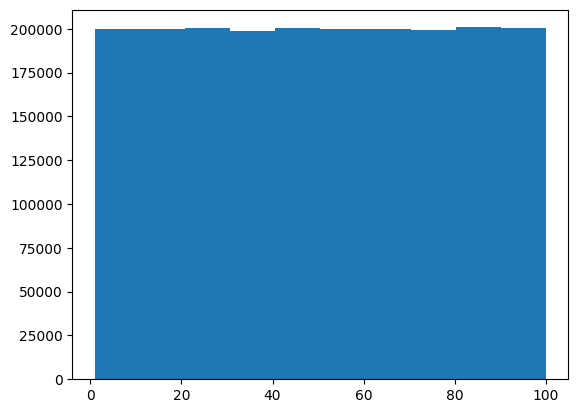

In [111]:
%matplotlib inline

plt.hist(data)

### Distribución Normal o Campana de Gauss

In [117]:
norm_data = np.random.randn(20000)

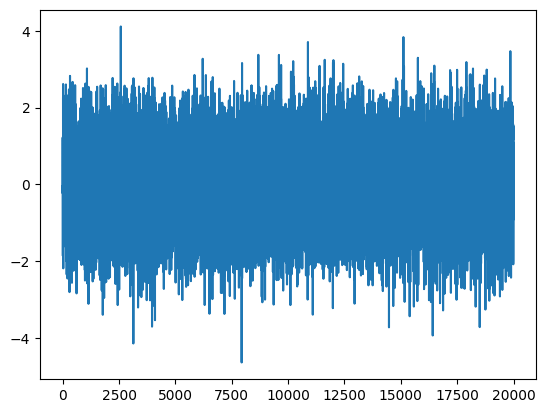

In [123]:
%matplotlib inline
x= range(0,20000)
plt.plot(x, norm_data)

(array([3.000e+00, 4.800e+01, 4.050e+02, 2.117e+03, 5.498e+03, 6.688e+03,
        3.918e+03, 1.164e+03, 1.500e+02, 9.000e+00]),
 array([-4.64208286, -3.76633934, -2.89059581, -2.01485229, -1.13910877,
        -0.26336525,  0.61237828,  1.4881218 ,  2.36386532,  3.23960885,
         4.11535237]),
 <BarContainer object of 10 artists>)

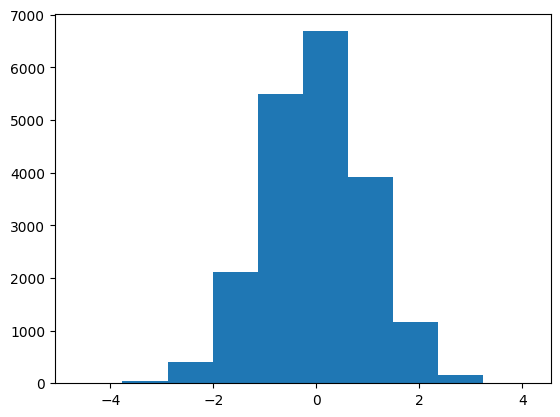

In [124]:
plt.hist(norm_data)

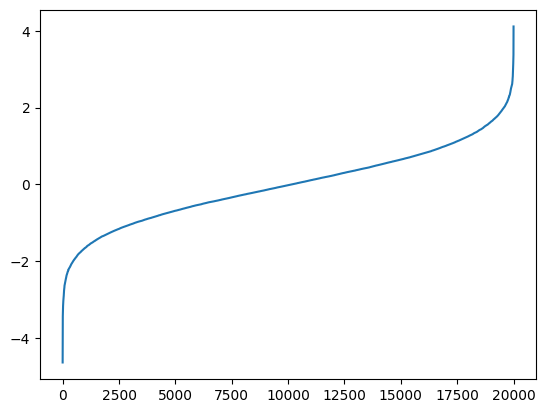

In [125]:
plt.plot(x, sorted(norm_data))

In [126]:
mu = 5.5
sd = 2.5
n_data_specific = mu + sd * np.random.randn(10000)

(array([   6.,   66.,  391., 1237., 2512., 2958., 1883.,  741.,  193.,
          13.]),
 array([-4.51930335, -2.61667359, -0.71404382,  1.18858594,  3.0912157 ,
         4.99384546,  6.89647523,  8.79910499, 10.70173475, 12.60436452,
        14.50699428]),
 <BarContainer object of 10 artists>)

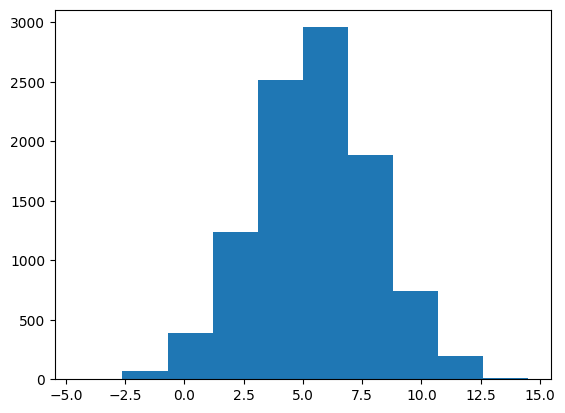

In [127]:
plt.hist(n_data_specific)

Esto es así por el teorema central del limite:
$Z = (X-\mu)/\sigma -> N(0,1)$

Que despejando la X (datos) nos queda:
$ X = Z*\sigma + \mu$

Para finalizar, la función 'randn' permite la generación de diversas muestras:

In [128]:
np.random.randn(2,4)

array([[1.36003671, 0.31807995, 0.59504131, 0.33987665],
       [1.60155435, 0.55149591, 0.99714922, 0.29157883]])

## Simulación de Montecarlo (ejercicio)

Vamos a implementar un método de simulación para calcular los digitos de PI. Para ello, lo que haremos, es calcular la probabilidad de caer en un circulo que esta circunscrito dentro de un cuadrado. Como se puede apreciar:
$
    P (caerCirculo) = \frac {caerCirculo}{div caerCuadrado} \rightarrow \frac{A_{circulo}}{A_{cuadrado}} \rightarrow \frac{\pi * r^2}{2*r*2*r} \rightarrow \frac{\pi}{4}
$

Para llevar a cabo la simulación lo que haremos serán los siguientes pasos:

1. Generar dos números aleatorios x e y entre 0 y 1.
2. Calculamos x*x e y*y que dan lugar al área del circulo
    a. Si el valor es inferior a 1 -> Estamos dentro del circulo
    b. Si el valos es superior a 1 -> Estamos fuera del circulo
3. Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro el circulo.
4. Usamos dicha probabilidad para calcular el valor de π
5. Hacemos repeticiones un numero "n" de veces para obtener diferentes aproximaciones de π
6. Calculamos el promedio para dar un valor final de π

In [141]:
def pi_montecarlo(n:int, n_exp: int) -> (float, any):
    pi_avg = 0
    pi_value_list = []
    for i in range (n_exp):
        value = 0
        x = np.random.uniform(0,1, n).tolist()
        y = np.random.uniform(0,1, n).tolist()
        result = [i1*i1 + i2*i2 for i1, i2 in zip(x, y)]
        value = sum(i <=1 for i in result)
        float_value = float(value)
        pi_value = float_value * 4/n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    fig = plt.plot(pi_value_list)
    return pi, fig

(3.141044999999998, [<matplotlib.lines.Line2D at 0x13ac4b700>])

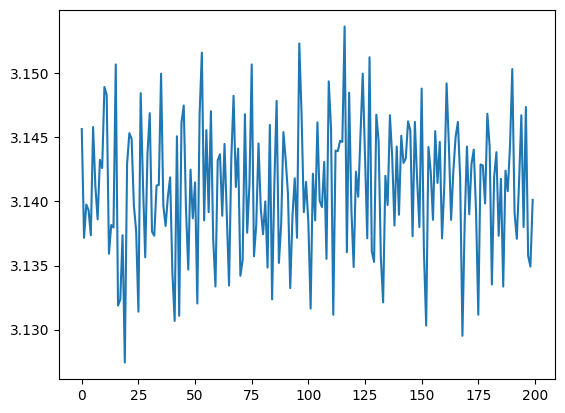

In [146]:
pi_montecarlo(100000, 200)

## Generación de datasets dummies

Lo que haremos es ir generando columnas con variables aleatorias generadas automaticamente.

In [148]:
import pandas as pd

In [153]:
n = 1000000
dummy_dataframe = pd.DataFrame({
    'A': np.random.randn(n),
    'B': 1.5 + 2.5 * np.random.randn(n),
    'C': np.random.uniform(5,32, n)
})

In [154]:
dummy_dataframe

,A,B,C
0,-0.233781,-0.668473,18.353163
1,0.749595,0.091350,18.914194
2,-0.688148,8.517699,21.526668
3,0.854582,0.649279,24.080405
4,0.143208,0.206456,16.445832
...,...,...,...
999995,-0.288525,4.244565,6.899332
999996,-0.217855,-0.976032,28.086697
999997,-1.071077,0.724705,12.193024
999998,-1.607497,5.738719,14.723873


In [155]:
dummy_dataframe.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001113,1.502381,18.495450
std,1.000742,2.495138,7.789770
min,-5.000358,-11.122026,5.000002
25%,-0.673062,-0.178703,11.752076
50%,0.001836,1.503398,18.489681
75%,0.675893,3.183070,25.242559
max,5.146897,13.523252,31.999998


(array([3.40000e+01, 1.48000e+03, 2.38530e+04, 1.47634e+05, 3.55617e+05,
        3.32639e+05, 1.20971e+05, 1.68350e+04, 9.12000e+02, 2.50000e+01]),
 array([-5.0003585 , -3.985633  , -2.9709075 , -1.95618199, -0.94145649,
         0.07326901,  1.08799451,  2.10272001,  3.11744551,  4.13217101,
         5.14689651]),
 <BarContainer object of 10 artists>)

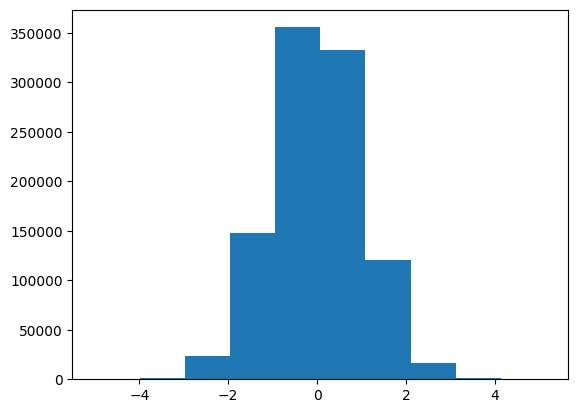

In [156]:
plt.hist(dummy_dataframe['A'])

(array([2.30000e+01, 1.04700e+03, 1.72080e+04, 1.15382e+05, 3.17986e+05,
        3.55630e+05, 1.60881e+05, 2.95990e+04, 2.18800e+03, 5.60000e+01]),
 array([-11.12202633,  -8.65749846,  -6.19297059,  -3.72844272,
         -1.26391485,   1.20061302,   3.66514089,   6.12966876,
          8.59419663,  11.0587245 ,  13.52325237]),
 <BarContainer object of 10 artists>)

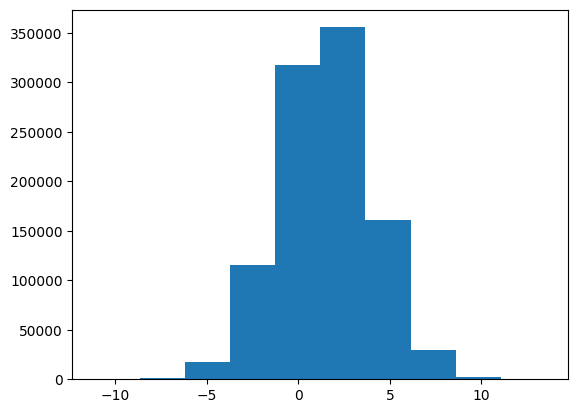

In [158]:
plt.hist(dummy_dataframe['B'])

(array([100048.,  99738., 100055.,  99896., 100684.,  99946.,  99935.,
        100382.,  99764.,  99552.]),
 array([ 5.00000181,  7.7000014 , 10.40000099, 13.10000058, 15.80000017,
        18.49999976, 21.19999934, 23.89999893, 26.59999852, 29.29999811,
        31.9999977 ]),
 <BarContainer object of 10 artists>)

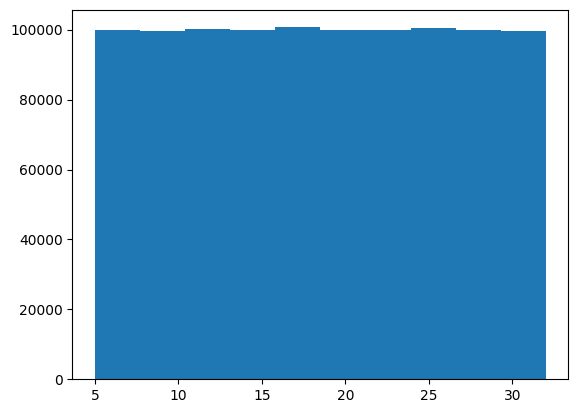

In [159]:
plt.hist(dummy_dataframe['C'])

In [160]:
data = pd.read_csv('../data/customer-churn-model/Customer Churn Model.txt')

In [161]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [164]:
column_names = data.columns.values.tolist()

In [166]:
a= len (column_names)
a

21

In [168]:
new_data = pd.DataFrame({
    'Column Name': column_names,
    'A': np.random.randn(a),
    'B': np.random.uniform(0,1, a)
})
new_data

,Column Name,A,B
0,State,-0.893168,0.145111
1,Account Length,-0.072220,0.993833
2,Area Code,-0.659364,0.042420
3,Phone,-0.258485,0.202612
4,Int'l Plan,1.769673,0.786215
5,VMail Plan,0.798475,0.294243
6,VMail Message,-0.903977,0.116621
7,Day Mins,-0.855221,0.877756
8,Day Calls,-0.496414,0.202219
9,Day Charge,0.839414,0.670415
